In [177]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [178]:
# Cargar el CSV generado en el preprocesamiento
df = pd.read_csv("../data/clientes_preprocesado.csv")
df.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,...,zonas_Sur,ambito_laboral_Finanzas,ambito_laboral_Otros,ambito_laboral_Salud,ambito_laboral_Servicios Publicos,ambito_laboral_Tecnologia/Industria,Campanna_anno_1.0,Campanna_anno_3.0,Campanna_anno_4.0,Campanna_anno_5.0
0,0,1,1.036719,1,2,0,3,-1.036493,1,1.052557,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0.873632,1,2,1,2,-0.873404,1,1.231266,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0.927994,1,2,1,3,-0.927767,1,-0.547295,...,0,0,0,0,0,0,0,1,0,0
3,1,0,-0.811600,0,1,0,4,0.811856,2,-0.889922,...,0,0,0,0,1,0,0,0,1,0
4,1,1,0.221284,0,2,1,2,-0.221045,1,-0.742655,...,0,0,1,0,0,0,0,0,0,0


In [179]:
# Seleccionar solo las columnas numéricas (excluyendo ID y categóricas ya codificadas)
numeric_cols = ['Edad', 'Ingresos_anuales_brutos', 'Experiencia_laboral', 'Gasto_medio_mensual_cuota', 'Dias_cliente', 'Digital_encuesta', 'Family_Size']
X = df[numeric_cols]


from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Selección de componentes principales para explicar el 95% de la varianza.
X_pca = pca.fit_transform(X)

print(f"Número de componentes seleccionados para explicar el 95% de la varianza: {pca.n_components_}")

Número de componentes seleccionados para explicar el 95% de la varianza: 2


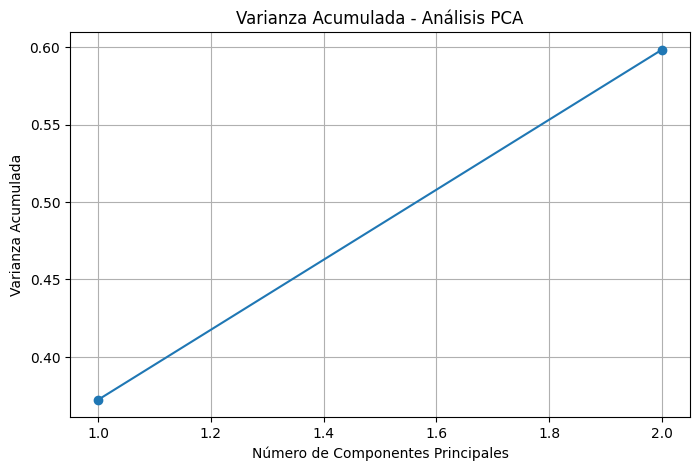

In [180]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza Acumulada - Análisis PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show()

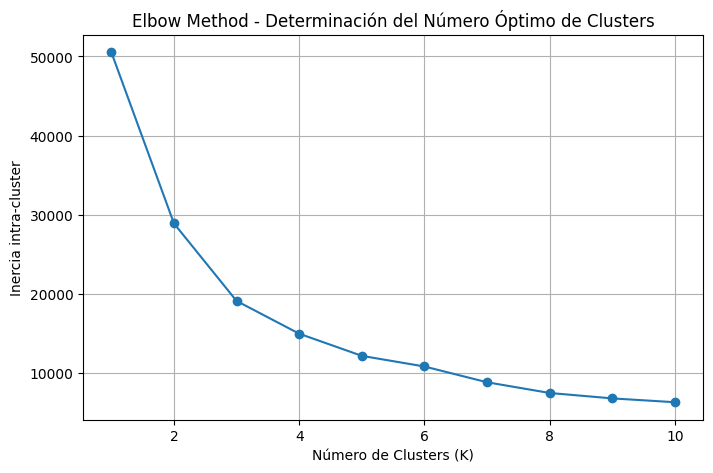

In [181]:
# Evaluación de la inercia para distintos valores de K.
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method - Determinación del Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia intra-cluster')
plt.grid()
plt.show()

Silhouette Score para k=2: 0.4052
Silhouette Score para k=3: 0.3979
Silhouette Score para k=4: 0.4128
Silhouette Score para k=5: 0.4034
Silhouette Score para k=6: 0.3839
Silhouette Score para k=7: 0.3861
Silhouette Score para k=8: 0.4149
Silhouette Score para k=9: 0.3893
Silhouette Score para k=10: 0.4056


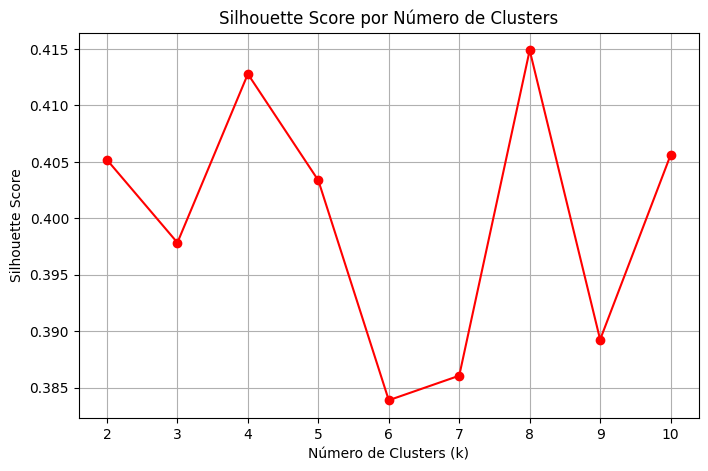

In [182]:
# Calcular silhouette scores para k de 2 a 10
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette.append(score)
    print(f"Silhouette Score para k={k}: {score:.4f}")

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette, 'ro-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por Número de Clusters')
plt.grid(True)
plt.show()

In [ ]:
clusters = 4 # Número óptimo de clusters determinado visualmente.
print(f"El número óptimo de clusters es: {clusters}")

El número óptimo de clusters es: 5


In [184]:
kmeans = KMeans(n_clusters=clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

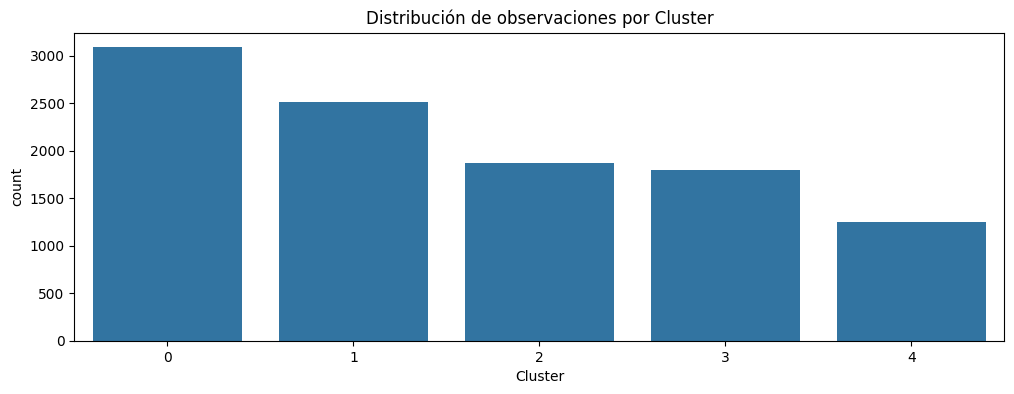

In [185]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Cluster', data=df)
plt.title('Distribución de observaciones por Cluster')
plt.show()

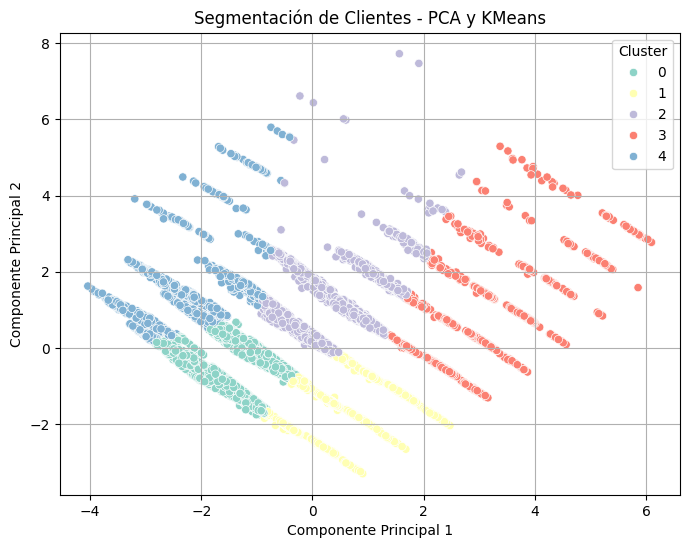

In [186]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set3')
plt.title('Segmentación de Clientes - PCA y KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.legend(title='Cluster')
plt.show()